In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data['data'].shape

(569, 30)

In [6]:
data['target'].shape

(569,)

In [7]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [13]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [14]:
import tensorflow as tf

In [15]:
n = X_train.shape[1]

In [16]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(1, input_shape=(n, ), activation='sigmoid') ) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print('Train_Score:', model.evaluate(X_train, y_train))
print('Test_Score:', model.evaluate(X_test, y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 5s 12ms/sample - loss: 0.6894 - accuracy: 0.6220 - val_loss: 0.5794 - val_accuracy: 0.6968
Epoch 2/100
381/381 [==============================] - 0s 1ms/sample - loss: 0.6237 - accuracy: 0.6824 - val_loss: 0.5273 - val_accuracy: 0.7872
Epoch 3/100
381/381 [==============================] - 0s 1ms/sample - loss: 0.5668 - accuracy: 0.7559 - val_loss: 0.4830 - val_accuracy: 0.8191
Epoch 4/100
381/381 [==============================] - 0s 1ms/sample - loss: 0.5180 - accuracy: 0.7874 - val_loss: 0.4455 - val_accuracy: 0.8564
Epoch 5/100
381/381 [==============================] - 0s 1ms/sample - loss: 0.4768 - accuracy: 0.8163 - val_loss: 0.4140 - val_accuracy: 0.8989
Epoch 6/100
381/381 [==============================] - 0s 1ms/sample - loss: 0.4429 - accuracy: 0.8320 - val_loss: 0.3866 - val_accuracy: 0.9096
Epoch 7/100
381/381 [==============================] - 0s 1ms/sample - loss: 0.4126

Train_Score: [0.09604625816498528, 0.984252]
188/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

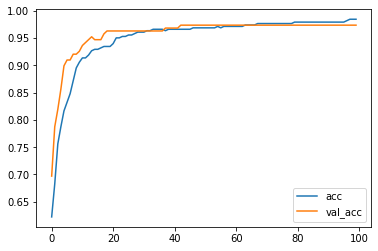

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

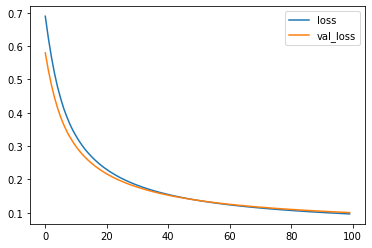

In [20]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Part2 : Making Predictions

In [21]:
p = model.predict(X_test)

In [22]:
p

array([[1.83971107e-01],
       [8.70641351e-01],
       [9.81534958e-01],
       [1.44682854e-01],
       [1.63391769e-01],
       [1.36515498e-03],
       [3.69591415e-02],
       [1.08711034e-01],
       [9.45355833e-01],
       [6.65767968e-01],
       [9.87757266e-01],
       [9.98656392e-01],
       [2.83277035e-03],
       [2.62349844e-04],
       [5.38612902e-02],
       [3.12953085e-01],
       [7.89613426e-01],
       [5.61475754e-05],
       [2.21282244e-04],
       [6.53636456e-03],
       [9.84941840e-01],
       [9.93348181e-01],
       [9.90604281e-01],
       [9.87290621e-01],
       [4.66294289e-02],
       [9.97669041e-01],
       [9.94503796e-01],
       [2.80490518e-03],
       [2.49207020e-04],
       [9.90697622e-01],
       [3.86238098e-05],
       [9.47151363e-01],
       [9.94986594e-01],
       [9.89119649e-01],
       [5.96046448e-08],
       [9.96597052e-01],
       [9.88151431e-01],
       [9.82196331e-01],
       [6.36815727e-02],
       [9.84315753e-01],


In [23]:
import numpy as np
p = np.round(p).flatten()
p

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0.], dtype=float32)

In [26]:
print('Manually calculated accuracy:', np.mean(p == y_test))
print('accuracy using tf method', model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.973404255319149
188/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Part 3: Saving Model

In [27]:
model.save('linear_classifier.h5')

In [28]:
! ls

 linear_classifier.h5  'Tensorflow 2.0 Linear Classification.ipynb'
 moore.csv	       'TF 2.0 Linear Regression.ipynb'
 moore.csv.1


In [29]:
model = tf.keras.models.load_model('linear_classifier.h5')

In [31]:
print(model.layers)

In [34]:
model.evaluate(X_test, y_test, verbose=0)

[0.10031071844253134, 0.9734042]

In [36]:
# from google.colab import files
# files.download('linear_classifier.csv')